In [1]:
import pandas as pd 
import imblearn
import numpy as np
pd.set_option('display.max_rows', 9999,'max_info_columns', 9999,'max_colwidth', 9999)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import Imputer
import datetime as dt
import gc
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import csv
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
import xlrd
warnings.filterwarnings('ignore')

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train=pd.read_csv('/home/tsl-yu/文档/天池-精准医疗/d_train_20180102.csv')

test=pd.read_csv('/home/tsl-yu/文档/天池-精准医疗/d_test_A_20180102.csv')

In [3]:
train1=pd.concat([train,test],axis=0,ignore_index=True,)

## 性别处理函数 

In [4]:
def sex(df):
    col=df.columns
    dic={ '男': 0 ,'女':1  }
    for c in col:
        if c=='性别':
            df[c].map(dic)
            
    return df

## 年龄阶段划分函数 

In [5]:
def age_split(df,n=5):
    col=df.columns
    
    for c in col:
        if c=='年龄':
            df['age_cata']=pd.cut(df[c],n,labels=False)
            
    return df

## 日期处理函数 

In [6]:
def pro_date(df):
    col=df.columns
    
    for c in col:
        if c=='体检日期':
            df['体检日期']=[dt.datetime.strptime(str,'%d/%m/%Y') for str in df['体检日期']]
            df['year']=[date.year for date in df['体检日期']]
            df['month']=[date.month for date in df['体检日期']]
            df['day']=[date.day for date in df['体检日期']]
            df['weekday']=[date.dayofweek for date in df['体检日期']]
            df.drop(c,axis=1,inplace=True)
    return df

##  去掉空值超过0.7的函数

In [7]:
def drop_null(df):
    for col in df.columns:
        a=df[col].isnull().sum()
        if a>len(df[col])*0.7:
            df=df.drop(col,axis=1)
            
    return df

## 以年龄、性别为依据，分组填充 

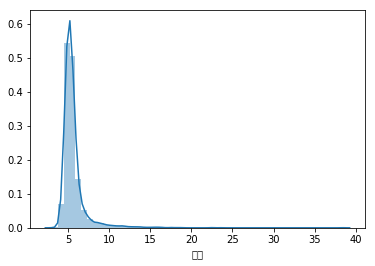

In [9]:
sns.distplot(train['血糖'])

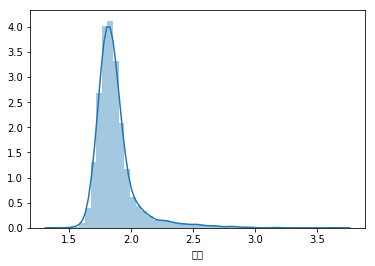

In [12]:
sns.distplot(np.log1p(train['血糖']))

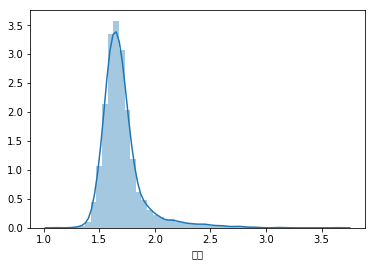

In [13]:
sns.distplot(np.log(train['血糖']))

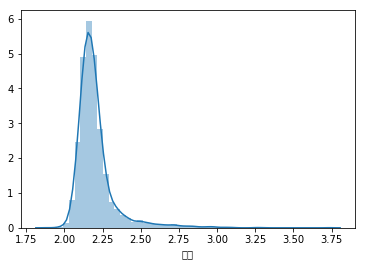

In [15]:
sns.distplot(np.log(3.5+train['血糖']))

In [2]:
from sklearn.datasets import make_classification
from collections import Counter
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

In [3]:
Counter(y)

Counter({0: 64, 1: 262, 2: 4674})

In [4]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)

In [7]:
Counter(y_resampled)

Counter({0: 4674, 1: 4674, 2: 4674})